# Importing libraries

In [2]:
# library for editing the data file
import sys

# library for data science
import pandas as pd 

# library for faster arrays
import numpy as np

# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="white", color_codes=True)

# library for ML algorithm
from sklearn.linear_model import LogisticRegression as LGR

# library for metrics
from sklearn import metrics as mtc

# Importing the dataset

In [16]:
# add a header line to the data file

with open("./datasets/iris.data", 'r+') as f:
        first_line = f.readline()
        if first_line != '"Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species"' :
                content = f.read()
                f.seek(0, 0)
                f.write('"Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species"'.rstrip('\r\n') + '\n' + content)


dataset = pd.read_csv("./datasets/iris.data")

# confirm dataset has been read
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualise the dataset

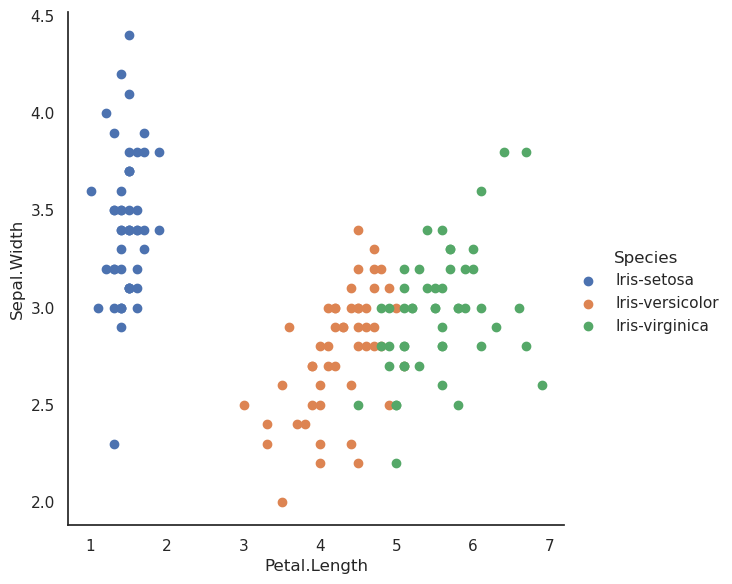

In [8]:
sb.FacetGrid(dataset, hue="Species", height=6).map(plt.scatter, "Petal.Length", "Sepal.Width").add_legend()

# Mapping categorical variables to numbers

In [9]:
# Map the different varieties to values
# Iris-setosa -> 0
# Iris-versicolor -> 1
# Iris-virginica -> 2

variety_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# replace the variety names with the newly mapped values
dataset["Species"] = dataset["Species"].map(variety_map)

# Preparing Inputs and Output values to train the model

In [10]:
input_values = dataset[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values
output_values = dataset[['Species']].values

# Train the Logistic Regression model

In [11]:
# initialize the model using default values for simplicity
model = LGR()

# feed the input values and the correct output values
model.fit(input_values,output_values)

/home/s4lty/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Make predictions

In [12]:
# classify the expected answers
expected = output_values

# feed the model input values
predicted = model.predict(input_values)

# Check the performance of the model

In [13]:
# compare the predicted values with the expected values
print(mtc.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



- As we can see the overall accuracy of the model is 97%
- The model can easily classify the 1st variety, Setosa, with ease as it has a precision of 100%
- The model can classify the other two varieties, Versicolor and Virginica, with a precision of 98% and a 94%, which is quite good.

# Plot the data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal.Width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal.Length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal.Width,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


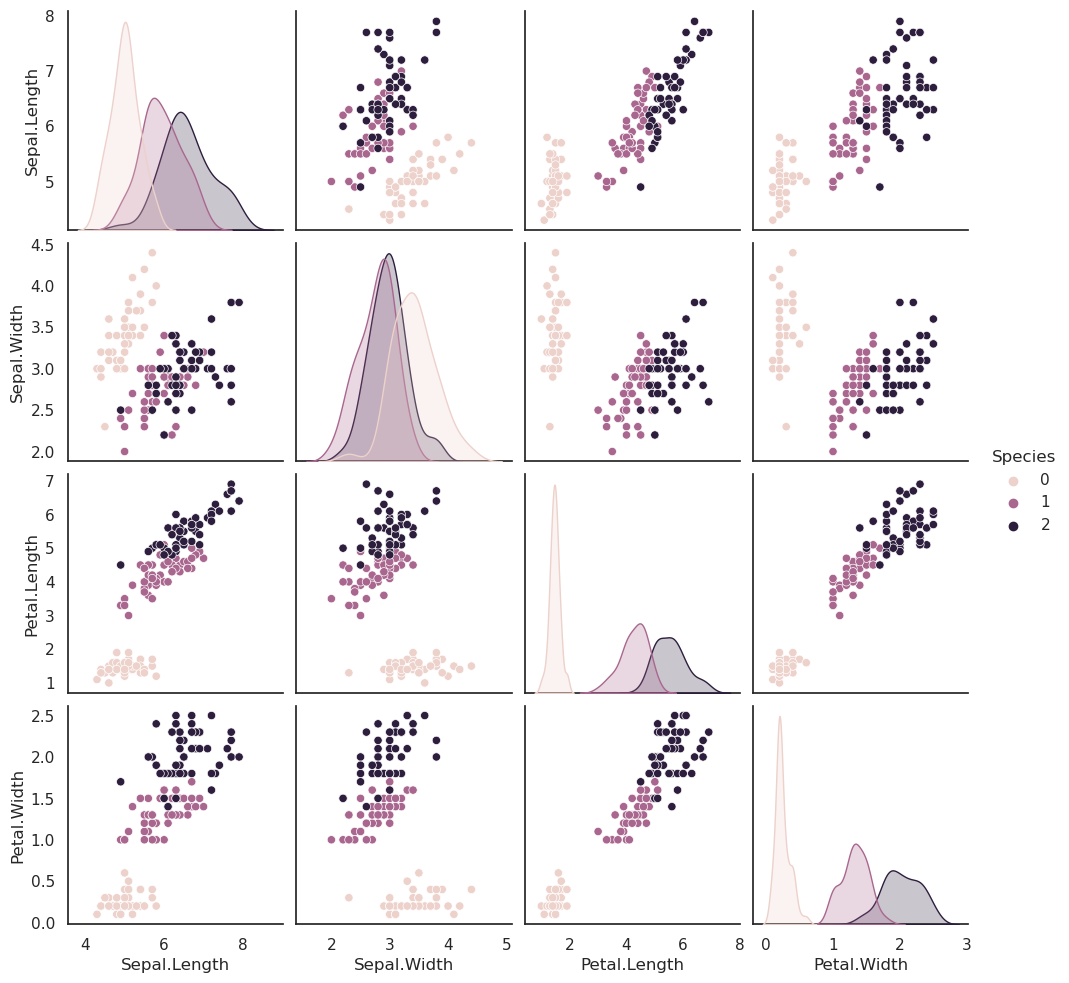

In [14]:
sb.pairplot(dataset,hue='Species')
dataset.corr()

- The plot shows the correlation between the different properties of the iris flower.
- This helps us understand how the model classified the varieties
- Species 0 is clearly separate from the other two thus it has a precision of 100%.
- Species 1 and 2 intersect at many places so a better model is needed to classify them with higher precision.